In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

SEED=42

from src.DataExplorer import DataExplorer
from src.styles import set_styles, TXT_ACC, TXT_RESET

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ---- REPRODICIBILITY ------------------------------------------------
np.random.seed(SEED)

# ---- PANDAS ---------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,}'.format


set_styles()

In [3]:
class CFG:
    path_train = 'data/train.csv'
    path_test = 'data/test.csv'
    target = 'Rings'

---------------------------------------------------------------------------------------------------- 
                      DATA 
 ---------------------------------------------------------------------------------------------------- 

 TRAIN     90615 rows, 9 columns


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.55,0.43,0.15,0.7715,0.3285,0.1465,0.24,11
1,F,0.63,0.49,0.145,1.13,0.458,0.2765,0.32,11
2,I,0.16,0.11,0.025,0.021,0.0055,0.003,0.005,6
3,M,0.595,0.475,0.15,0.9145,0.3755,0.2055,0.25,10
4,I,0.555,0.425,0.13,0.782,0.3695,0.16,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.037,0.045,6
90611,M,0.555,0.425,0.15,0.879,0.3865,0.1815,0.24,9
90612,I,0.435,0.33,0.095,0.3215,0.151,0.0785,0.0815,6
90613,I,0.345,0.27,0.075,0.2,0.098,0.049,0.07,6




 TEST     60411 rows, 8 columns


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.238,0.6185,0.3125,0.3005
1,M,0.58,0.46,0.16,0.983,0.4785,0.2195,0.275
2,M,0.56,0.42,0.14,0.8395,0.3525,0.1845,0.2405
3,M,0.57,0.49,0.145,0.874,0.3525,0.1865,0.235
4,I,0.415,0.325,0.11,0.358,0.1575,0.067,0.105
...,...,...,...,...,...,...,...,...
60406,I,0.345,0.26,0.085,0.1775,0.0735,0.0265,0.05
60407,F,0.525,0.41,0.145,0.8445,0.3885,0.167,0.205
60408,I,0.59,0.44,0.155,1.122,0.393,0.2,0.265
60409,F,0.66,0.525,0.19,1.4935,0.5885,0.3575,0.435







---------------------------------------------------------------------------------------------------- 
                      DUPLICATES 
 ---------------------------------------------------------------------------------------------------- 

 TRAIN 
0 duplicated rows out of 90615 (0.0%)


 TEST 
0 duplicated rows out of 60411 (0.0%)





---------------------------------------------------------------------------------------------------- 
                      TARGET 
 ---------------------------------------------------------------------------------------------------- 



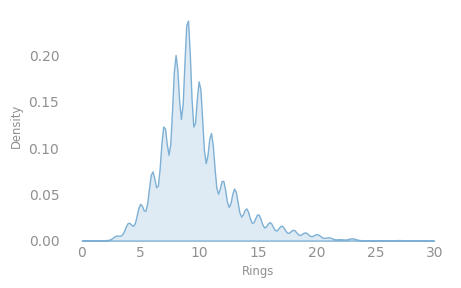






---------------------------------------------------------------------------------------------------- 
                      FEATURES 
 ---------------------------------------------------------------------------------------------------- 

Numerical features with few values:  []


 Categorical features 


,nunique,count NaN
Sex,3,0




 Numerical features 


,nunique,count NaN,mean,min,max,std
Height,90,0,0.1354640567235005,0.0,1.13,0.03800756247879023
Diameter,126,0,0.4016791590796226,0.055,0.65,0.09802631939013517
Length,157,0,0.5170984218948298,0.075,0.815,0.11821670901526686
Whole weight.2,979,0,0.16942184439662308,0.0005,0.76,0.10090888847544377
Shell weight,1129,0,0.22589784472769409,0.0015,1.005,0.13020333874135173
Whole weight.1,1799,0,0.34077810682558074,0.001,1.488,0.20442847843867115
Whole weight,3175,0,0.7890349514429179,0.002,2.8255,0.4576706970769096







---------------------------------------------------------------------------------------------------- 
                      CATEGORICAL FEATURES 
 ---------------------------------------------------------------------------------------------------- 



,train,test
Sex,,
I,33093,22241
M,31027,20783
F,26495,17387








---------------------------------------------------------------------------------------------------- 
                      NUMERICAL FEATURES 
 ---------------------------------------------------------------------------------------------------- 



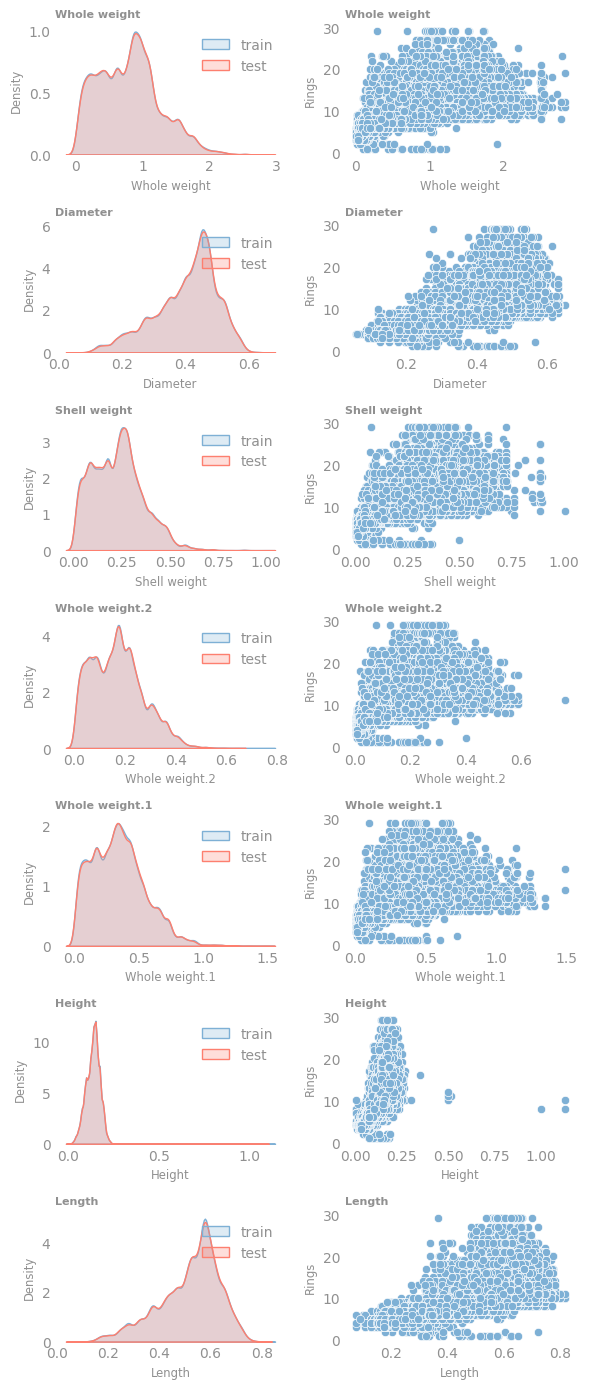






---------------------------------------------------------------------------------------------------- 
                      CORRELATION MATRIX 
 ---------------------------------------------------------------------------------------------------- 



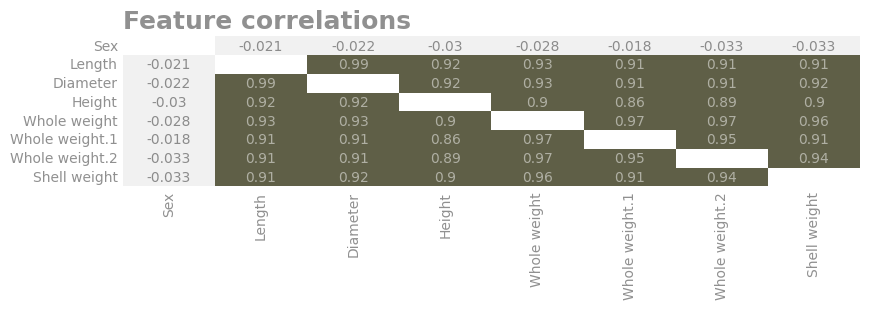






---------------------------------------------------------------------------------------------------- 
                      CORRELATIONS TO TARGET 
 ---------------------------------------------------------------------------------------------------- 



,corr
0,
Shell weight,0.6947655842875777
Height,0.6657718018300474
Diameter,0.6368323390197846
Length,0.6237856646237635
Whole weight,0.6172738962824822
Whole weight.2,0.5889543539062496
Whole weight.1,0.5150668067459404
Sex,0.02630821150453116


In [4]:
eda = DataExplorer(CFG.path_train, CFG.path_test, CFG.target)
eda.data_at_a_glance()

*Insights*:
- Highly correlated features
- All numerical features are correlated to target => important
- 'Height' has some datapoints very different from the rest => potential outliers?
- There is a subset of data with target values of 1 and 2 that is very different from the rest of the data => outliers or special cases?

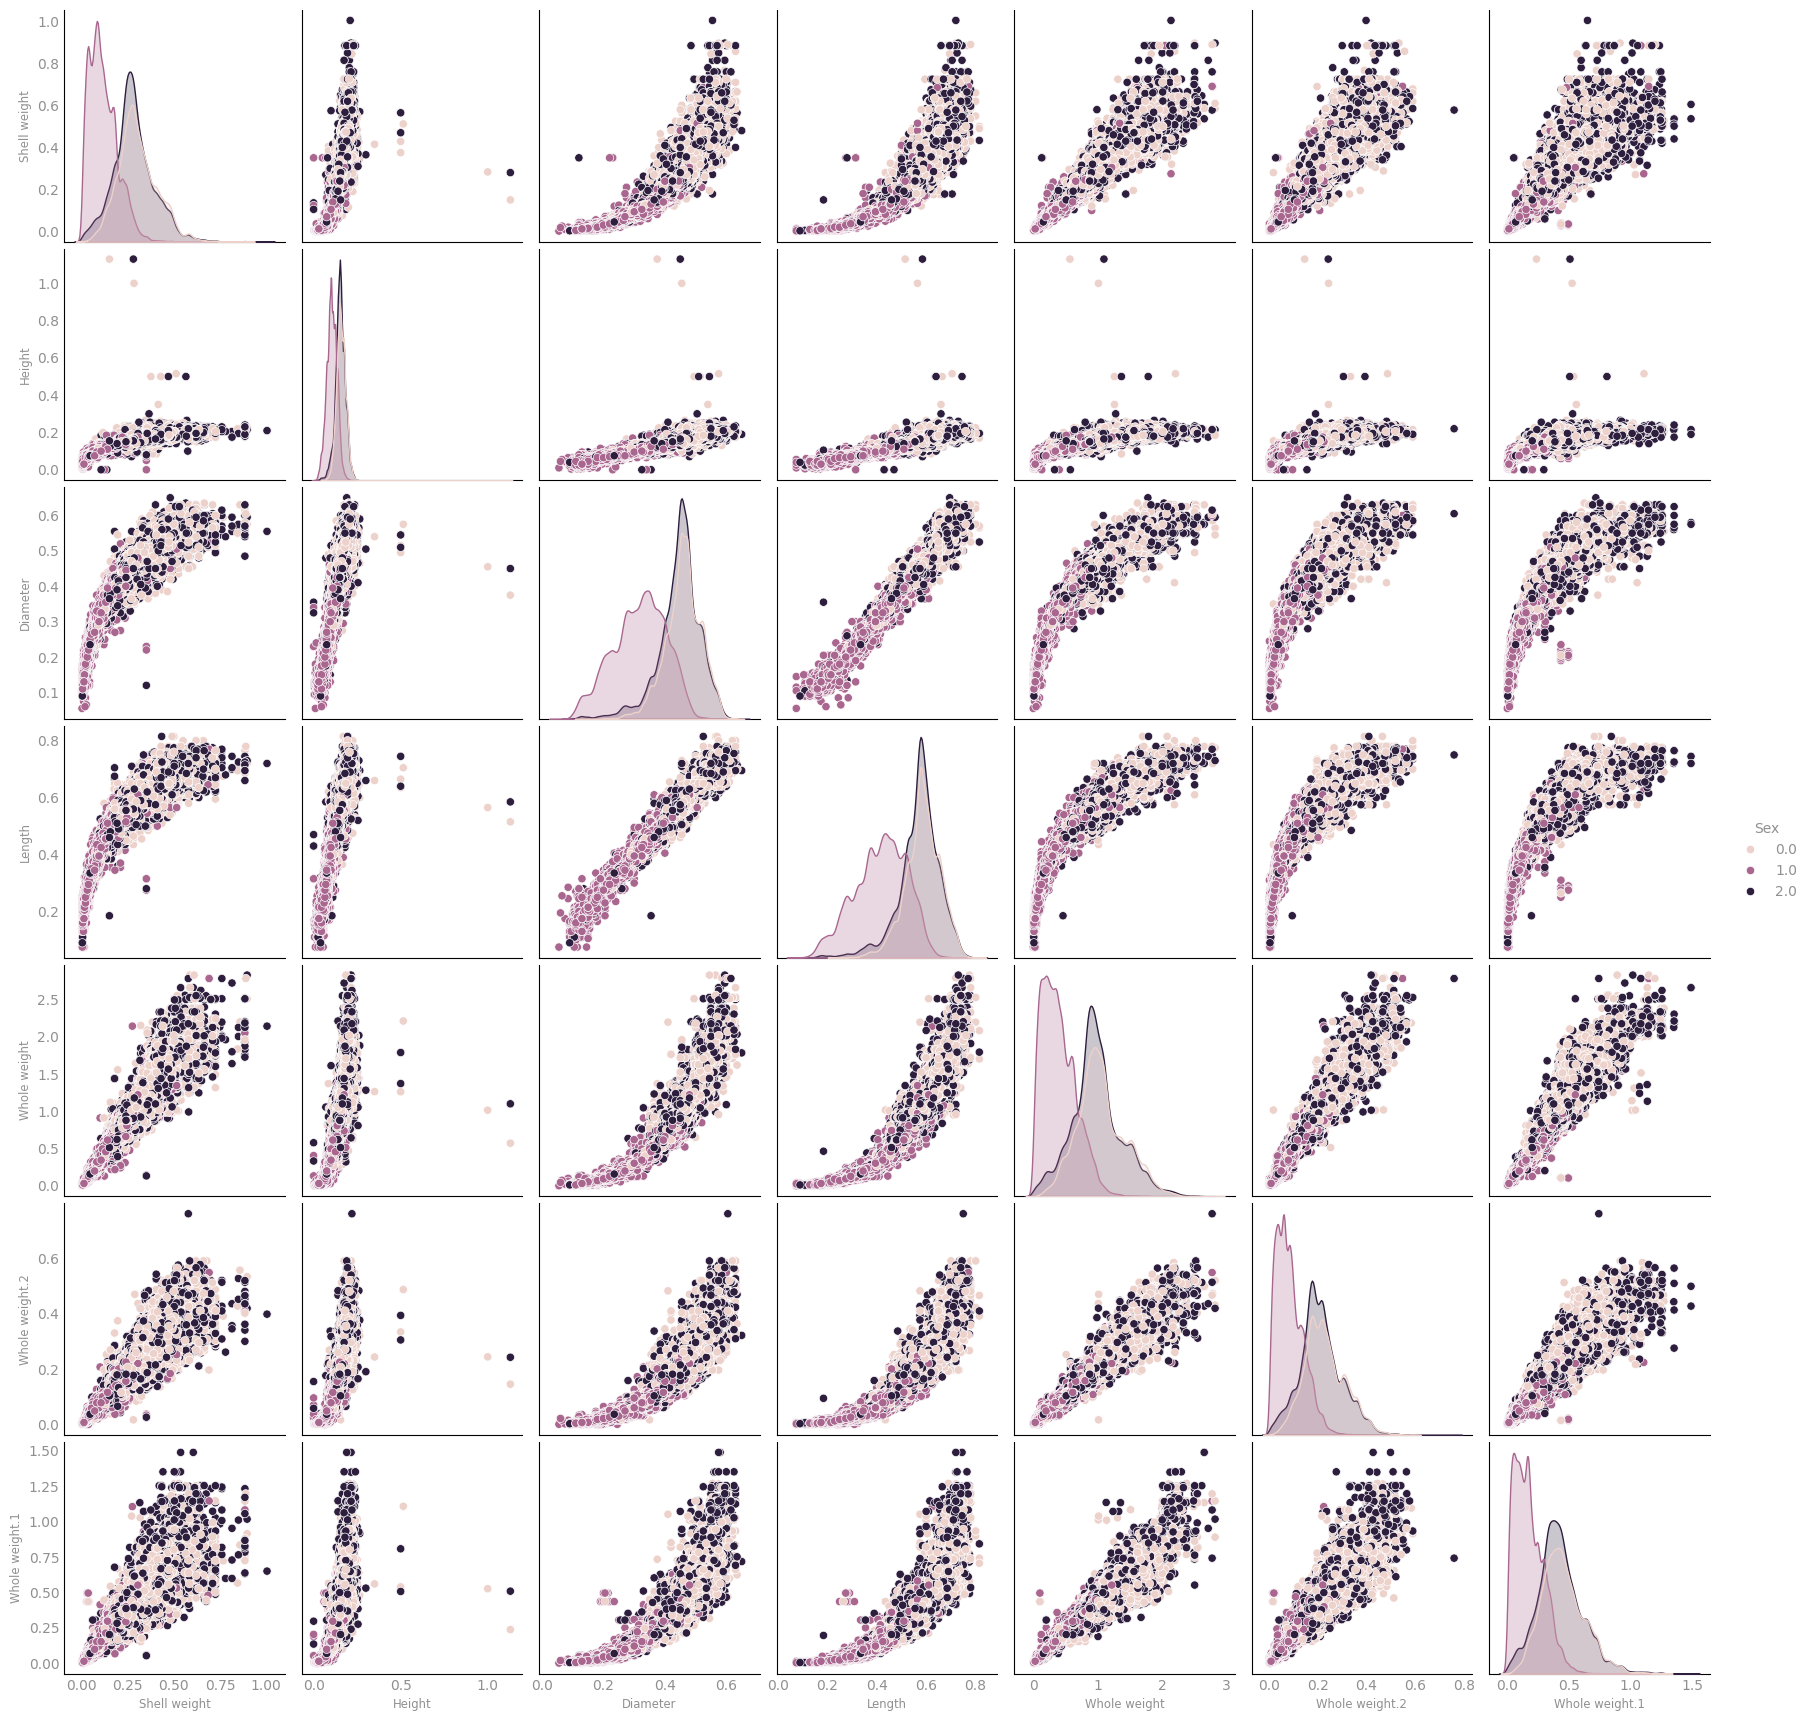

In [5]:
df_train, df_test = eda.get_data()
features = ['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 'Whole weight.2', 'Whole weight.1', 'Sex']
sns.pairplot(df_train[features], hue='Sex')

*Insights*:
- Quadratic relationship between linear and weight features
- Distributions for datapoints with feature 'Sex'='I' are different from 'Sex'!='I'
- Distributions for datapoints with feature 'Sex'='M' and 'Sex'='F' are very similar

In [6]:
df_corrs_bysex = pd.DataFrame(features, columns=['feature'])
for val in df_train['Sex'].unique():
    X_train = df_train.query(f'Sex == {val}')
    y_train = X_train[CFG.target]

    corrs = [(feature, abs(X_train[feature].corr(y_train))) for feature in features]
    df_corrs = pd.DataFrame(corrs)
    df_corrs.columns = ['feature', f'corr {val}']

    df_corrs_bysex = df_corrs_bysex.merge(df_corrs, on='feature')

X_train = df_train.query(f'Sex != 1')
y_train = X_train[CFG.target]

corrs = [(feature, abs(X_train[feature].corr(y_train))) for feature in features]
df_corrs = pd.DataFrame(corrs)
df_corrs.columns = ['feature', f'corr not 1']

df_corrs_bysex = df_corrs_bysex.merge(df_corrs, on='feature')

display(df_corrs_bysex.sort_values('corr 0.0', ascending=False))

,feature,corr 0.0,corr 1.0,corr 2.0,corr not 1
0,Shell weight,0.45776701701745837,0.7610377042383026,0.5185521044702578,0.49385443449369204
1,Height,0.3713717221402991,0.7385835066590376,0.4575706914630664,0.4223889819549321
4,Whole weight,0.3043107484252831,0.7229019961708288,0.386062914963527,0.3526455241042613
2,Diameter,0.2848037664859832,0.7251221443100111,0.3872876539662167,0.34685623521982323
5,Whole weight.2,0.25397039860913617,0.7068152562666447,0.3442711339160778,0.3072706753673548
3,Length,0.25239798447503287,0.7184095065782156,0.366229633339522,0.32120816079034836
6,Whole weight.1,0.13356656704061137,0.6624907820954747,0.23257304932556191,0.19143100689542694
7,Sex,NaN,NaN,NaN,0.06764514580277671


*Insights*: 

Subset of Sex=1 (Sex='I' originally) is better correlated to target. Maybe split data into two separate sets?

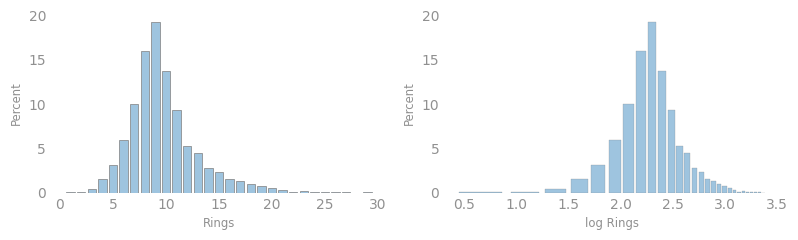

In [7]:
df_train = pd.read_csv(CFG.path_train).drop('id', axis=1)
df_train['Sex'] = df_train['Sex'].map({'I':0, 'F':1, 'M':2})

_, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 2.5))
sns.histplot(df_train[CFG.target], ax=axes[0], kde=False, discrete=True, shrink=0.8, stat='percent', ec='gray');
sns.histplot(np.log1p(df_train[CFG.target]), ax=axes[1], kde=False, stat='percent', shrink=0.8, ec='gray', bins=[np.log1p(i+0.5) for i in range(29)]);
axes[1].set_xlabel('log Rings')
plt.tight_layout();